In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  provaL


Current folders are:
provaL.0


In [2]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

In [3]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
        "_total_inv_goods_revenues_", "_total_cons_goods_revenues_",
       "_total_inv_goods_inventories_","_total_in_progress_inv_goods_inventories_",
       "_total_cons_goods_inventories_","_total_in_progress_cons_goods_inventories_", "_total_lost_production_",
       "_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_", "total_capQ_dynamic_"]

In [4]:
# series database
series={}
for name in names:
    k=0
    #which folder
    os.chdir("../"+folder+"."+str(k))
    #create the dataframe with the content of the folder with extension 0 (k value here)
    #for the 'name' series
    series[name]=pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None)

    for k in range(1,rankNum):   #add the same series from the other folders
        #which folder
        os.chdir("../"+folder+"."+str(k))
        series[name]=series[name].add(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

'_total_production_'

,0,1,2,3,4
0,42.958621,61.036412,36.803369,39.874429,6.505627
1,89.766346,108.278927,94.538373,76.583089,2.966691
2,116.750034,160.923085,117.303424,29.092354,3.323749
3,140.589760,206.549918,134.346510,38.652231,5.287278
4,177.799590,227.859772,155.972719,30.032486,4.931300
...,...,...,...,...,...
259,40.153211,44.749657,8.954534,0.883331,0.000000
260,40.153211,43.802254,6.316569,0.000000,0.000000
261,38.140839,43.802254,4.278666,2.939764,0.000000
262,36.670464,42.628918,4.469787,0.652469,1.053003


'____________________________________________________________'

'_total_cost_of_production_'

,0,1,2,3,4
0,155.833333,209.805556,128.888889,104.069444,24.694444
1,325.833333,371.583333,324.444444,201.083333,12.347222
2,425.000000,551.055556,404.444444,77.611111,14.111111
3,521.333333,707.777778,462.222222,100.541667,17.638889
4,663.000000,778.555556,537.777778,81.138889,17.638889
...,...,...,...,...,...
259,167.166667,169.361111,35.555556,3.527778,0.000000
260,167.166667,169.361111,24.444444,0.000000,0.000000
261,158.666667,169.361111,17.777778,10.583333,0.000000
262,150.166667,164.305556,22.222222,1.763889,5.291667


'____________________________________________________________'

'_total_cost_of_unused_factors_'

,0,1,2,3,4
0,801.463522,745.927395,911.584172,1734.809403,161.465118
1,631.463522,584.149617,716.028617,1637.795515,173.812340
2,532.296856,404.677395,636.028617,1761.267737,172.048451
3,435.963522,247.955173,578.250839,1738.337181,168.520673
4,294.296856,177.177395,502.695283,1757.739959,168.520673
...,...,...,...,...,...
259,293.719020,410.580272,1025.018177,2955.641197,193.732710
260,292.955925,409.816790,1035.458637,2933.952524,194.630400
261,300.698129,415.058611,1035.459310,2957.161187,200.528800
262,308.445596,419.361251,1030.353497,2920.781016,195.136239


'____________________________________________________________'

'_total_inv_goods_revenues_'

,0,1,2,3,4
0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0
4,646.986243,0.0,0.0,0.0,0.0
...,...,...,...,...,...
259,39.214039,0.0,0.0,0.0,0.0
260,673.770687,0.0,0.0,0.0,0.0
261,526.257266,0.0,0.0,0.0,0.0
262,274.173853,0.0,0.0,0.0,0.0


'____________________________________________________________'

'_total_cons_goods_revenues_'

,0,1,2,3,4
0,0.0,0.000000,0.000000,144.945554,31.480534
1,0.0,0.000000,0.000000,320.189902,18.876117
2,0.0,0.000000,518.893707,206.116626,26.298922
3,0.0,0.000000,395.448924,172.542639,32.683553
4,0.0,390.361693,920.384187,191.121069,29.443808
...,...,...,...,...,...
259,0.0,592.881482,82.192062,10.661763,0.154373
260,0.0,77.467151,37.935998,3.874949,0.073390
261,0.0,560.567410,57.269731,19.732505,0.024258
262,0.0,137.962619,75.538707,4.556614,5.773827


'____________________________________________________________'

'_total_inv_goods_inventories_'

,0,1,2,3,4
0,0.000000,0,0,0,0
1,0.000000,0,0,0,0
2,0.000000,0,0,0,0
3,0.000000,0,0,0,0
4,552.500000,0,0,0,0
...,...,...,...,...,...
259,45.581136,0,0,0,0
260,700.855109,0,0,0,0
261,384.274652,0,0,0,0
262,309.686475,0,0,0,0


'____________________________________________________________'

'_total_in_progress_inv_goods_inventories_'

,0,1,2,3,4
0,202.583333,0,0,0,0
1,626.166667,0,0,0,0
2,1178.666667,0,0,0,0
3,1856.400000,0,0,0,0
4,2165.800000,0,0,0,0
...,...,...,...,...,...
259,1049.750000,0,0,0,0
260,585.650000,0,0,0,0
261,659.316667,0,0,0,0
262,578.283333,0,0,0,0


'____________________________________________________________'

'_total_cons_goods_inventories_'

,0,1,2,3,4
0,0,0.000000,0.000000,135.290278,27.163889
1,0,0.000000,0.000000,300.068242,19.758810
2,0,0.000000,509.333333,187.502752,22.696955
3,0,0.000000,398.070862,180.795834,24.567118
4,0,377.902778,838.438246,171.247963,22.180860
...,...,...,...,...,...
259,0,484.558914,67.278331,11.038011,0.179203
260,0,89.304593,44.483623,3.930169,0.076288
261,0,448.423714,61.859625,15.105203,0.027362
262,0,120.717663,55.679804,4.243255,5.832023


'____________________________________________________________'

'_total_in_progress_cons_goods_inventories_'

,0,1,2,3,4
0,0,272.747222,154.666667,0.0,0.0
1,0,755.805556,544.000000,0.0,0.0
2,0,1472.177778,520.000000,0.0,0.0
3,0,2392.288889,840.000000,0.0,0.0
4,0,3026.508333,781.333333,0.0,0.0
...,...,...,...,...,...
259,0,640.791667,53.333333,0.0,0.0
260,0,860.961111,50.666667,0.0,0.0
261,0,670.366667,29.333333,0.0,0.0
262,0,837.958333,24.000000,0.0,0.0


'____________________________________________________________'

'_total_lost_production_'

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
259,0,0,0,0,0
260,0,0,0,0,0
261,0,0,0,0,0
262,0,0,0,0,0


'____________________________________________________________'

'_total_cost_of_lost_production_'

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
259,0,0,0,0,0
260,0,0,0,0,0
261,0,0,0,0,0
262,0,0,0,0,0


'____________________________________________________________'

'_updatedLabor_'

,0,1,2,3,4
0,364.0,371.0,506.0,835.0,102.0
1,364.0,371.0,506.0,835.0,102.0
2,364.0,371.0,506.0,835.0,102.0
3,364.0,371.0,506.0,835.0,102.0
4,364.0,371.0,506.0,835.0,102.0
...,...,...,...,...,...
259,351.0,470.0,964.0,2760.0,180.0
260,351.0,476.0,958.0,2795.0,186.0
261,351.0,476.0,958.0,2751.0,186.0
262,351.0,476.0,958.0,2751.0,186.0


'____________________________________________________________'

'_updatedCapital_'

,0,1,2,3,4
0,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
1,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
2,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
3,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
4,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
...,...,...,...,...,...
259,7142.569619,7146.189915,6277.292587,11385.983359,957.626161
260,7092.968441,7096.563596,6233.700277,11306.914030,950.975979
261,7043.711715,7047.281905,6190.410692,11228.393794,944.371979
262,6994.797051,6998.342447,6147.421729,11150.418837,937.813840


'____________________________________________________________'

'total_capQ_dynamic_'

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
259,0,0,0,0,0
260,0,0,0,0,0
261,0,0,0,0,0
262,0,0,0,0,0


'____________________________________________________________'

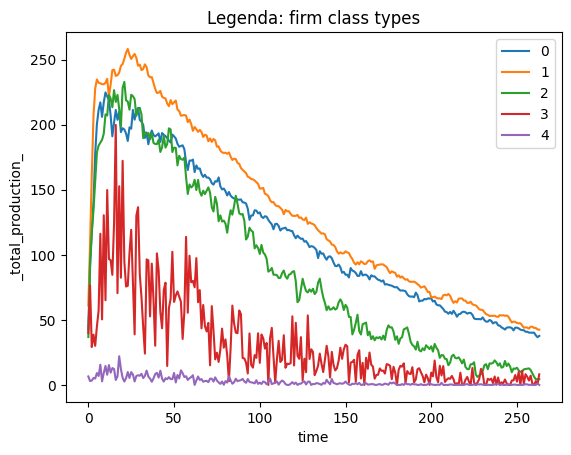

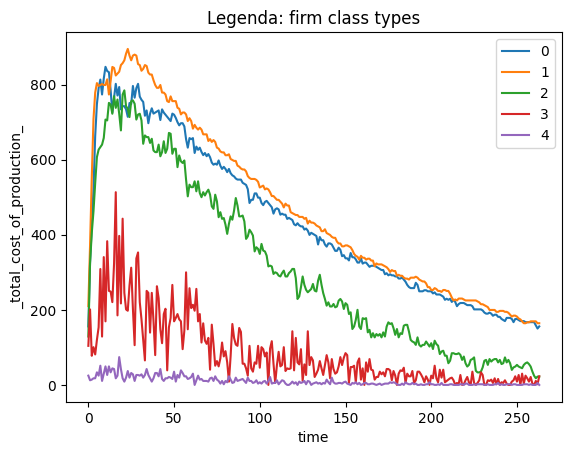

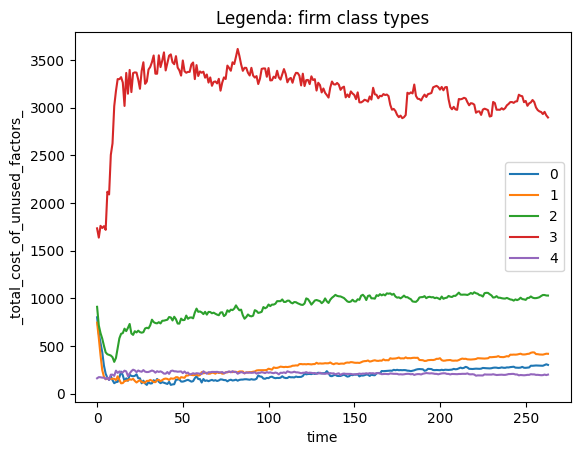

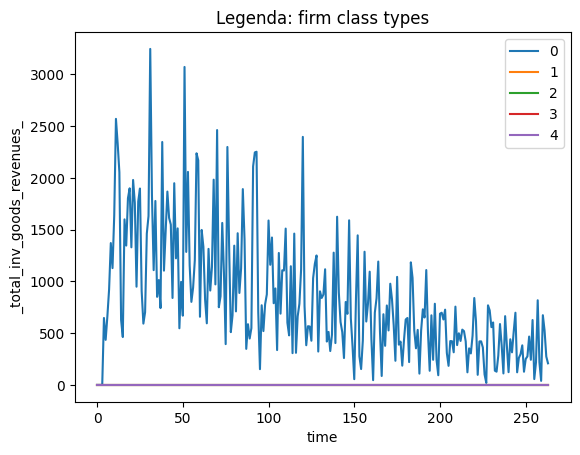

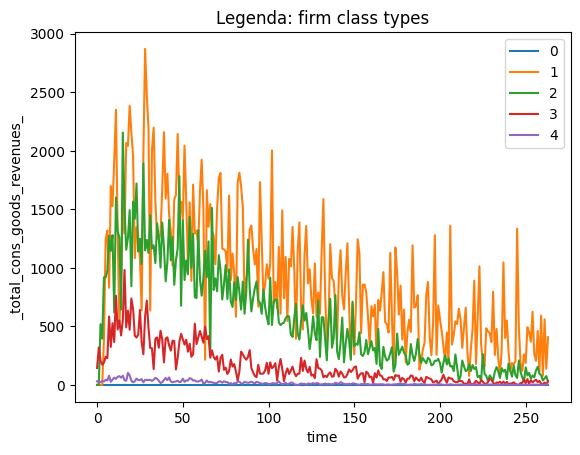

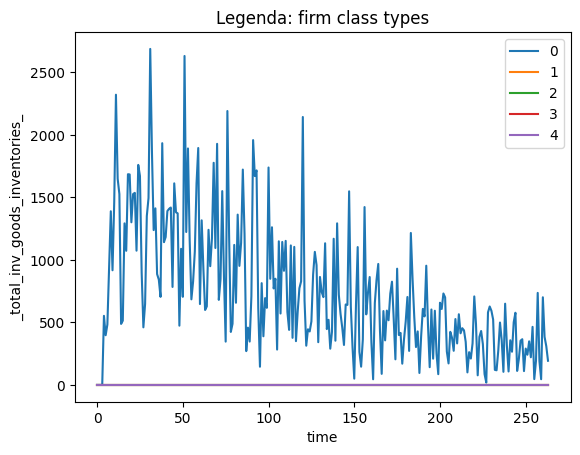

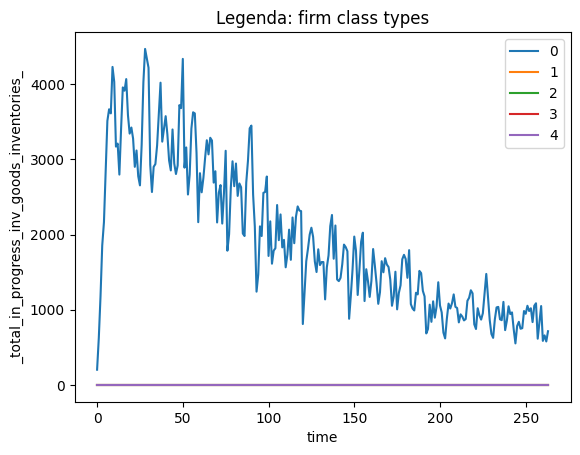

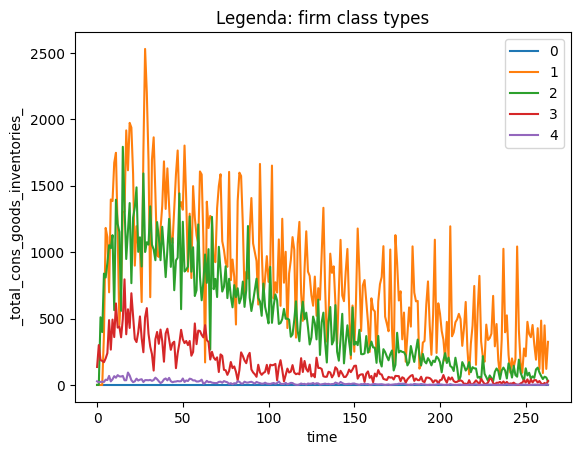

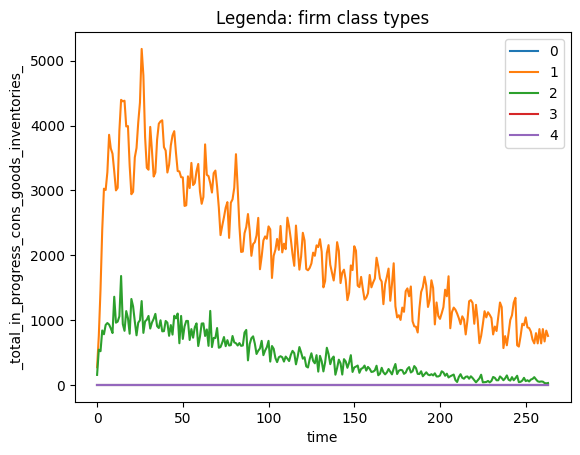

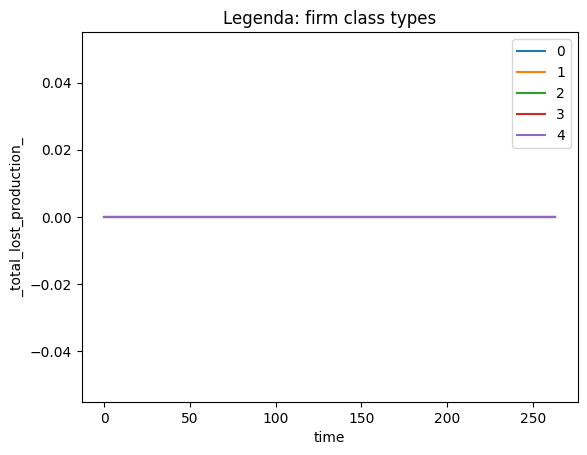

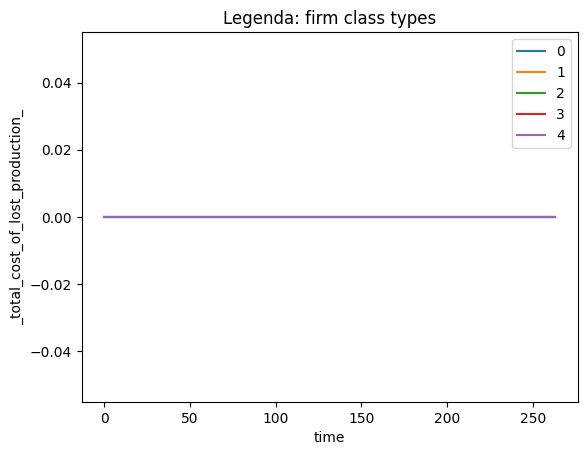

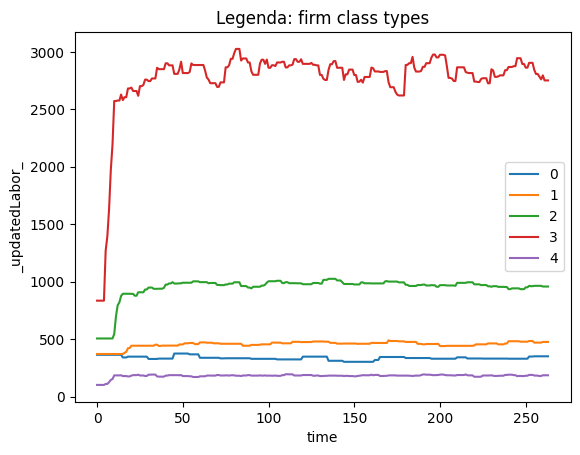

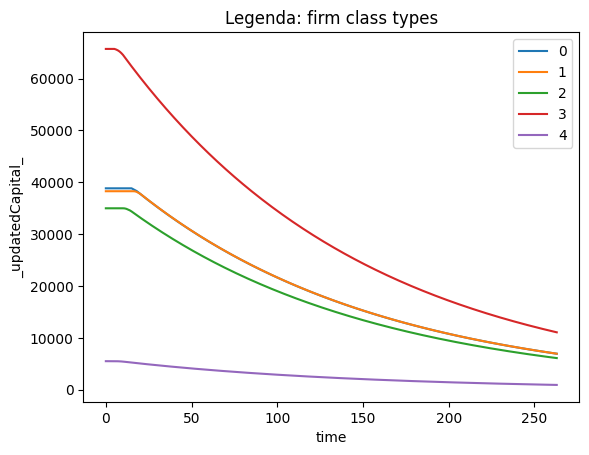

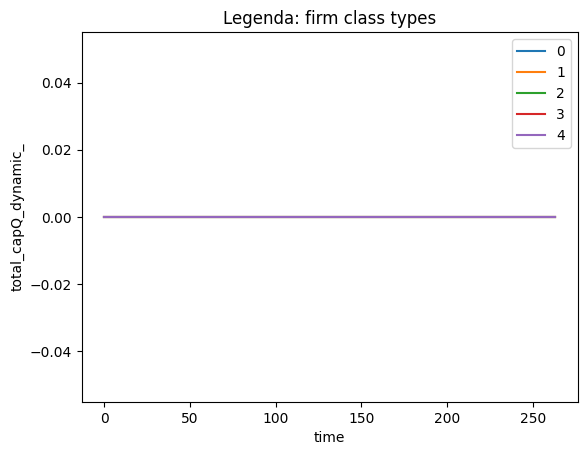

In [5]:
for name in names:
    display(name)
    display(series[name])
    display("____________________________________________________________")
    series[name].plot(title="Legenda: firm class types",xlabel="time",ylabel=name)